
# Task 7: Dimensionality Reduction & Stock Price Prediction

This notebook contains solutions for:
- Part 1: Dimensionality Reduction using PCA on Iris dataset
- Part 2: Stock Price Prediction using ARIMA on simulated dataset


## Part 1: Dimensionality Reduction using PCA

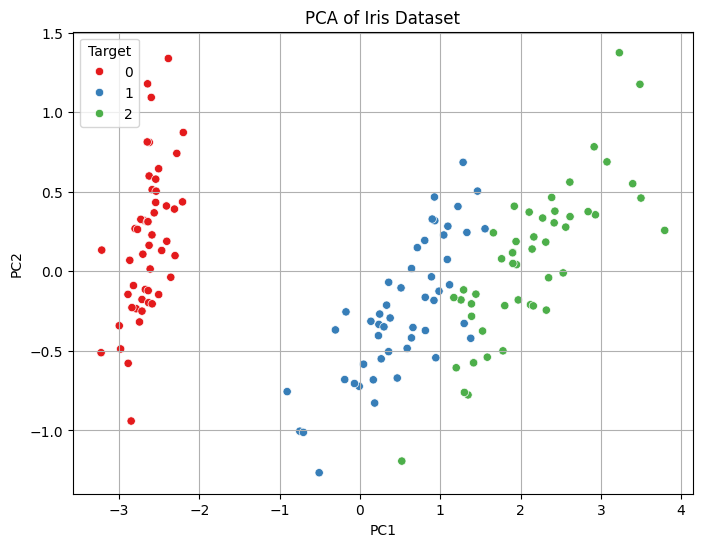

In [7]:

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Target', palette='Set1')
plt.title("PCA of Iris Dataset")
plt.grid(True)
plt.show()


In [9]:
!pip install statsmodels


  Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl (9.6 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [st


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Part 2: Stock Price Prediction using ARIMA

C:\Users\aasth\AppData\Local\Temp\ipykernel_10120\842486895.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_stock.fillna(method='ffill', inplace=True)


MAE: 25.10
RMSE: 29.11
MAPE: 17.59%


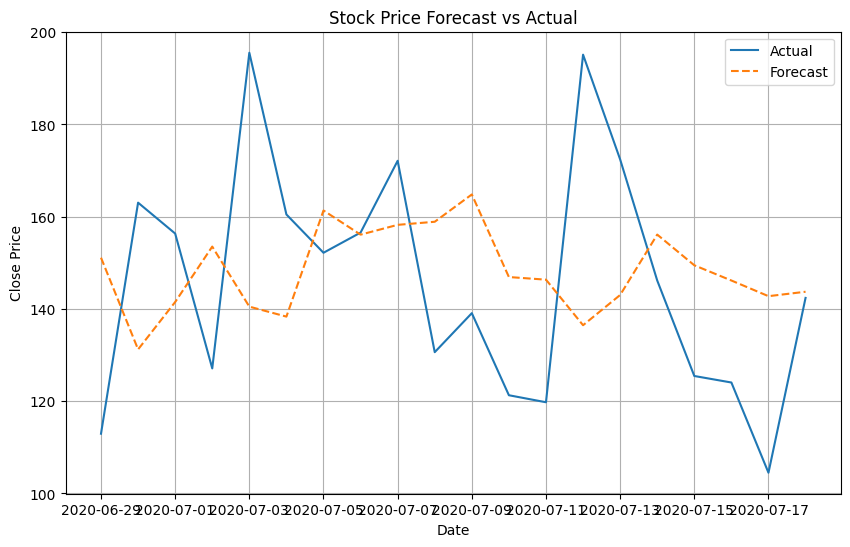

In [10]:

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Simulate stock dataset
np.random.seed(0)
dates = pd.date_range(start="2020-01-01", periods=200, freq='D')
open_prices = np.random.uniform(100, 200, size=200)
close_prices = open_prices + np.random.normal(0, 2, size=200)
volume = np.random.randint(1000, 5000, size=200)
df_stock = pd.DataFrame({
    'Date': dates,
    'Open': open_prices,
    'Close': close_prices,
    'Volume': volume
})

# Preprocess
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock.set_index('Date', inplace=True)
df_stock = df_stock.asfreq('D')
df_stock.fillna(method='ffill', inplace=True)

# Feature Engineering
df_stock['Close_Lag1'] = df_stock['Close'].shift(1)
df_stock['MA_5'] = df_stock['Close'].rolling(window=5).mean()
df_stock.dropna(inplace=True)

# ARIMA
model = ARIMA(df_stock['Close'], order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.predict(start=len(df_stock)-20, end=len(df_stock)-1, typ='levels')
actual = df_stock['Close'].iloc[-20:]

# Evaluation
mae = mean_absolute_error(actual, forecast)
rmse = np.sqrt(mean_squared_error(actual, forecast))
mape = np.mean(np.abs((actual - forecast) / actual)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot
plt.figure(figsize=(10,6))
plt.plot(actual.index, actual, label='Actual')
plt.plot(actual.index, forecast, label='Forecast', linestyle='--')
plt.title("Stock Price Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()
